<h1>Decision Tree Regression - Financial Stock Price Indication</h1>


<h4> Danayal Khan </h4>


<h4>Importing Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



Reading data 

In [2]:
df = pd.read_csv(r'C:\Users\danay\OneDrive\Desktop\AUS\Spring20\MachineLearning\FinancialDataProject\200-financial-indicators-of-us-stocks-20142018\2014_Financial_Data.csv', index_col = "Abbrv")
df

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
Abbrv,,,,,,,,,,,,,,,,,,,,,
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.0,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,...,-0.0384,0.0000,-0.0041,-0.0049,0.0000,0.0000,0.0213,Technology,29.362884,1
TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,11326000.0,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,...,0.1529,0.0000,-0.1872,0.1823,0.0000,0.2830,-0.0637,Technology,-31.167763,0
USATP,4.200000e+07,NaN,2.700000e+07,1.500000e+07,NaN,1.400000e+07,1.500000e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,-23.558900,0


Applying classifying function to generate the classes that will be used as labels

In [3]:
def classifying1(x):
    if x > 1: 
        if x < 10:
            return 1
        if x < 100:
            return 2
        if x < 1000:
            return 3
        if x < 10000:
            return 4
        if x < 100000:
            return 5
        if x > 1000000:
            return 6
    
    else:
        if x > -10:
            return -1
        if x > -100:
            return -2
        if x > -1000:
            return -3
        if x < 1000:
            return -4
        

In [34]:
def classifying2(x):
    if x > 1: 

        if x < 100:
            return 2

        if x < 10000:
            return 4

        if x > 1000000:
            return 6
    
    else:

        if x > -100:
            return -2

        if x < 1000:
            return -4
        

In [5]:
def classifying(x):
    if x > 1: 

        if x < 1000:
            return 2

   

        if x > 1000000:
            return 6
    
    else:

        if x > -100:
            return -2

        if x < 1000:
            return -4
        

In [6]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying)


Dropping other labels that allowed us to generate the final "classes" label

In [7]:
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


2015 PRICE VAR [%]       1.000000
SG&A Expenses Growth     0.249030
Capex to Revenue         0.174685
classes                  0.053149
Class                    0.028272
                           ...   
Earnings Yield          -0.059552
Free Cash Flow Yield    -0.958440
operatingProfitMargin         NaN
operatingCycle                NaN
cashConversionCycle           NaN
Length: 224, dtype: float64

In [8]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])

In [9]:
df = df.fillna(0)

In [10]:
nparray = df.to_numpy()
nparray

array([[ 7.44010000e+10, -7.13000000e-02,  3.90300000e+10, ...,
         0.00000000e+00, -1.74600000e-01, -2.00000000e+00],
       [ 3.73414805e+09,  1.17370000e+00,  2.80562544e+09, ...,
         1.64840000e+00,  1.73130000e+00, -2.00000000e+00],
       [ 9.83750000e+10,  1.82000000e-02,  7.81380000e+10, ...,
         0.00000000e+00,  2.34000000e-02,  2.00000000e+00],
       ...,
       [ 4.20000000e+07,  0.00000000e+00,  2.70000000e+07, ...,
         0.00000000e+00,  0.00000000e+00, -2.00000000e+00],
       [ 3.40758000e+08,  1.34400000e-01,  3.15948000e+08, ...,
         0.00000000e+00,  6.50000000e-02,  2.00000000e+00],
       [ 4.03373680e+07,  1.92500000e-01,  2.12936750e+07, ...,
         2.77800000e-01, -2.68000000e-02, -2.00000000e+00]])

Splitting the data into features and labels

In [11]:
features = nparray[:,0:-1]
label = nparray[:,-1]

Splitting matrices into random train and test subsets n number of times to ensure there is no single random split bias

In [12]:
for i in range (100):
    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3046, 221)
(762, 221)
(3046,)
(762,)


In [14]:
clf_1 = DecisionTreeClassifier(max_depth=1000, min_samples_split = 100, min_samples_leaf = 100, max_leaf_nodes = 990)


clf_1.fit(X_train, y_train)


# Predict
y_1 = clf_1.predict(X_test)


tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'max_depth':[5,10,15,20,30,40,50,60]}
clf_4 = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, return_train_score = True, n_jobs = -1)
clf_4.fit(X_train, y_train)




C:\Users\danay\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [15]:
print("Train accuracy for clf_1 is: ", clf_1.score(X_train, y_train))

print("Train accuracy for clf_4 is: ", clf_4.score(X_train, y_train))


print('Test accuracy for clf_4 is: ', clf_1.score(X_test, y_test))

print('Test accuracy is for clf_4 is: ', clf_4.score(X_test, y_test))


Train accuracy for clf_1 is:  0.6746552856204859
Train accuracy for clf_4 is:  0.6595535128036769
Test accuracy for clf_4 is:  0.6036745406824147
Test accuracy is for clf_4 is:  0.6430446194225722


In [16]:
results = clf_4.cv_results_


df2 = pd.DataFrame.from_dict(results)

In [17]:
df2["rank_test_score"].sort_values(ascending = False)

197    288
71     287
142    286
35     285
89     284
      ... 
6        1
43       1
25       1
133      1
79       1
Name: rank_test_score, Length: 288, dtype: int32

In [25]:
df2.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.471896,0.049948,0.003211,0.001606,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.629508,0.633826,...,0.617856,0.011422,98,0.634236,0.643414,0.643824,0.647107,0.641362,0.641989,0.004292
1,0.522637,0.047896,0.002056,0.002196,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.622951,0.633826,...,0.617858,0.011306,90,0.653530,0.643414,0.643824,0.650800,0.647517,0.647817,0.003923
2,0.543462,0.056867,0.001423,0.001540,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.622951,0.633826,...,0.619171,0.010375,76,0.653530,0.643414,0.655724,0.650800,0.647517,0.650197,0.004364
3,0.578048,0.042146,0.002165,0.002087,gini,5,7,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.622951,0.640394,...,0.622127,0.013035,40,0.653530,0.653262,0.655724,0.650800,0.655314,0.653726,0.001751
4,0.616751,0.054150,0.001600,0.001959,gini,5,8,"{'criterion': 'gini', 'max_depth': 5, 'max_lea...",0.627869,0.643678,...,0.621469,0.013380,48,0.658456,0.660648,0.656545,0.659417,0.659007,0.658815,0.001345


The following is data preparation to plot the top results against their test scores. 

In [32]:
topranks = df2['rank_test_score'] <10

df3 = df2[topranks]

df4 = df3[['param_max_depth', 'param_max_leaf_nodes', 'mean_test_score', 'mean_train_score', 'rank_test_score']]

pd.set_option('mode.chained_assignment', None)

df4['depth_leafnodes']=df4['param_max_depth'].astype(str)+'_'+df4['param_max_leaf_nodes'].astype(str)

df4

,param_max_depth,param_max_leaf_nodes,mean_test_score,mean_train_score,rank_test_score,depth_leafnodes
6,5,10,0.626395,0.665791,1,5_10
7,5,11,0.625740,0.669402,9,5_11
25,10,11,0.626395,0.668417,1,10_11
43,15,11,0.626395,0.668417,1,15_11
61,20,11,0.626395,0.668417,1,20_11
79,30,11,0.626395,0.668417,1,30_11
97,40,11,0.626395,0.668417,1,40_11
115,50,11,0.626395,0.668417,1,50_11
133,60,11,0.626395,0.668417,1,60_11


As the table indicated, there are numerous paramters tied for first place. We will choose the ones with the least complexity as our final chosen decision tree classification paramters: 5 maximum depth nodes and 10 maximum leaf nodes.

The following is a plot that shows the top ten results from the gridsearch. On the x axis, the maximum depth and the maximum leaf nodes are labelled such as "maxdepth_maxleafnodes" and the test score is labelled on the y-axis

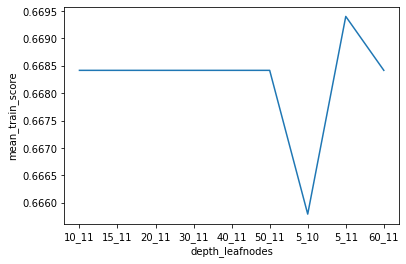

In [35]:
ax = sns.lineplot(x="depth_leafnodes", y="mean_train_score", data=df4)

The above graph may indicate the training accuracy for the chosen paramters is the lowest by far, however the difference is only 0.008 since the values on the y-axis have a very small range themselves

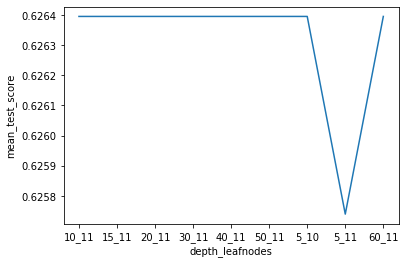

In [36]:
ax = sns.lineplot(x="depth_leafnodes", y="mean_test_score", data=df4)

Training accuracy is:  0.6595535128036769
Predicion accuracy is:  0.6430446194225722


[Text(221.20714285714286, 199.32, 'X[50] <= 238436000.0\ngini = 0.489\nsamples = 3046\nvalue = [1788, 15, 1242, 1]'),
 Text(155.44285714285715, 163.07999999999998, 'X[48] <= 72125608.0\ngini = 0.475\nsamples = 2726\nvalue = [1691, 13, 1021, 1]'),
 Text(95.65714285714286, 126.83999999999999, 'X[137] <= 135.367\ngini = 0.463\nsamples = 2393\nvalue = [1538, 12, 842, 1]'),
 Text(71.74285714285715, 90.6, 'X[95] <= 0.234\ngini = 0.47\nsamples = 2263\nvalue = [1425, 11, 826, 1]'),
 Text(47.82857142857143, 54.359999999999985, 'X[138] <= 17.272\ngini = 0.459\nsamples = 1958\nvalue = [1271, 10, 676, 1]'),
 Text(23.914285714285715, 18.119999999999976, 'gini = 0.476\nsamples = 1469\nvalue = [912, 10, 547, 0]'),
 Text(71.74285714285715, 18.119999999999976, 'gini = 0.391\nsamples = 489\nvalue = [359, 0, 129, 1]'),
 Text(95.65714285714286, 54.359999999999985, 'gini = 0.503\nsamples = 305\nvalue = [154, 1, 150, 0]'),
 Text(119.57142857142857, 90.6, 'gini = 0.229\nsamples = 130\nvalue = [113, 1, 16, 0]

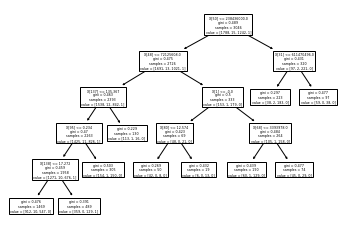

In [37]:
clf_final = DecisionTreeClassifier(max_depth=5, max_leaf_nodes = 10)

clf_final.fit(X_train, y_train)

print('Training accuracy is: ', clf_final.score(X_train, y_train))


print('Predicion accuracy is: ', clf_final.score(X_test, y_test))

tree.plot_tree(clf_final)



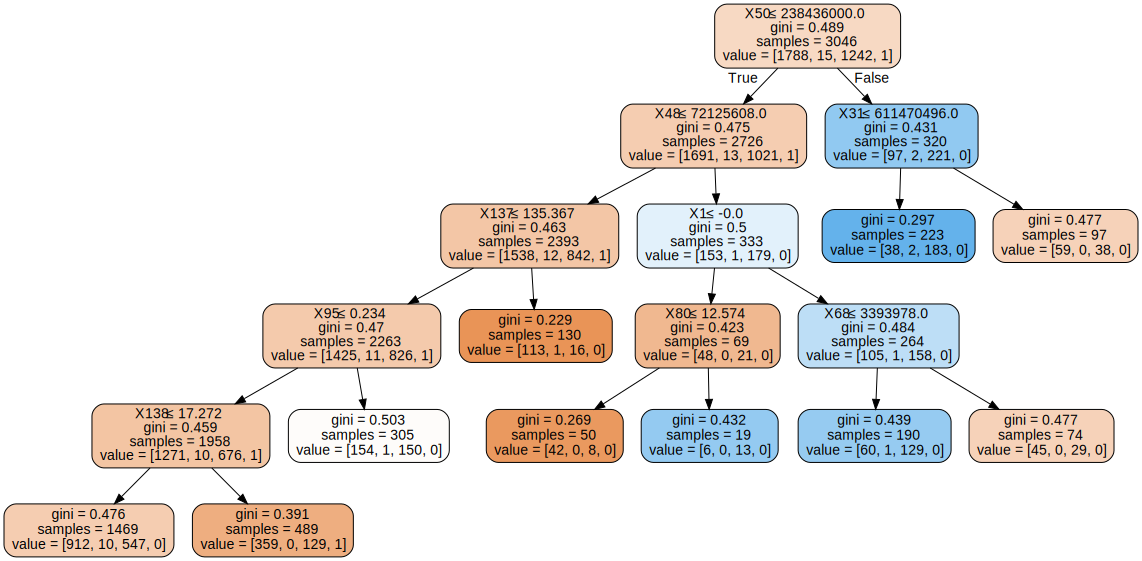

In [38]:
dot_data = tree.export_graphviz(clf_final, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The method to finding the best accuracy from decision tree classification was to use a Grid Search approach. The grid search approach allows the user to input values for different paramters to be tested. Then, the algorithm fits the model using all combinations of the paramters provided and chooses the paramters according to the accuracy. The training and testing accuracy was plotted against the different paramters used by the GridSearchCV approach. The accuracy achieved was only 0.463254593175853 and perhaps using another machine learning approach would increase the accuracy of our results. The data was cleaned with the help of Kernals uploaded on Kaggle of the dataset. This is essential since machine learning algorithms require data to be of a certain type to work efficiently.

By reducing the number of out output classes,by using function classifying() rather than classifying1(), we saw an increase in accuracy: 0.463 to 0.6430446194225722